<a href="https://colab.research.google.com/github/suresh88/interviews/blob/main/NRGAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NRG take home Assignment

# Question 1:	If an event has log-odds 3.2, what is the probability of this event?

In [32]:
import math

# Given log-odds
log_odds = 3.2

# Compute probability
probability = math.exp(log_odds) / (1 + math.exp(log_odds))
print(f"probability={round(probability, 3)}")

probability=0.961


## Explanation:
### Calculating Probability from Log-odds

#### Step 1: Understand the Log-Odds Formula

Log-odds (also called the logit function) is given by: \
$
\begin{align}
log(\frac{p}{1-p}) = \text{log-odds}
\end{align}
$

where:

* p is the probability of the event occurring.
* $
\begin{align}
\frac{p}{1-p}
\end{align}
$ is called the odds of the event

We are given that log-odds = 3.2, so: \
$
\begin{align}
log(\frac{p}{1-p}) = 3.2
\end{align}
$

#### Step 2: Convert Log-Odds to Odds
To remove the logarithm, take the exponential of both sides:

$
\begin{align}
\frac{p}{1−p} = {e}^{3.2}
\end{align}
$

Using a calculator:

$
\begin{align}
{e}^{3.2} \approx 24.53
\end{align}
$

So, the odds of the event occurring are 24.53:1.

#### Step 3: Convert Odds to Probability

The relationship between odds and probability is:

$
\begin{align}
p = \frac{odds}{1+odds}
\end{align}
$


Substituting the value:

$
\begin{align}
p = \frac{24.53}{1+24.53}
\end{align}
$

$
\begin{align}
p = \frac{24.53}{25.53}
\end{align}
$

$
\begin{align}
p \approx 0.961
\end{align}
$

Final Answer:

The probability of the event occurring is 0.961 (or 96.1%).

# Question 2:	Fit a model to the height_data.csv file. For every 10 units of increase in weight, how much taller does the model predict a person gets?


## Solution Approach

1. **Load the data** from `height_data.csv`.
2. **Fit a linear regression model** using **height** as the target and **weight** as the predictor.
3. **Extract the coefficient** for **weight**, which represents the change in height per unit increase in weight.
4. **Multiply the coefficient by 10** to find the predicted height increase for a 10-unit weight increase.


In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv("/content/sample_data/height_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


In [35]:
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


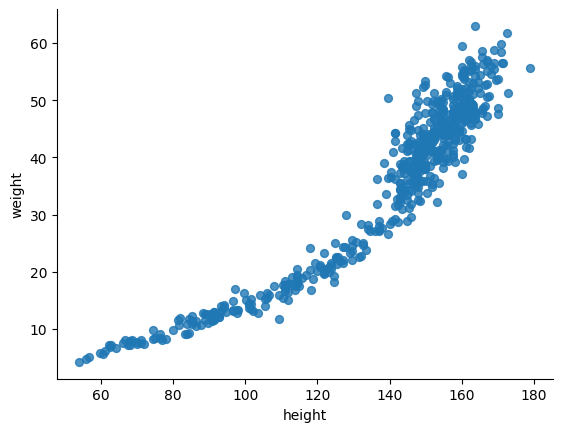

In [37]:
# @title height vs weight

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='height', y='weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

##### Step 1: Understanding the Data
The dataset contains 544 rows and 4 columns:

- `height` (Target Variable) – Person's height in cm.
- `weight` (Predictor) – Person's weight in kg.
- `age` – Person's age.
- `male` – Binary variable (1 = Male, 0 = Female).

Since the question asks about height prediction based on weight, I will fit a simple linear regression model with height as the dependent variable and weight as the independent variable.

Let's fit the model and analyze the effect of a 10-unit increase in weight on height. ​​

In [39]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Define independent and dependent variables
X = df[['weight']]  # Predictor
y = df['height']  # Target

# Add constant term for intercept in regression model
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Get model summary
model_summary = model.summary()

# Display regression results
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     4177.
Date:                Sat, 15 Mar 2025   Prob (F-statistic):          7.25e-257
Time:                        07:33:15   Log-Likelihood:                -1987.7
No. Observations:                 544   AIC:                             3979.
Df Residuals:                     542   BIC:                             3988.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.4359      1.052     71.725      0.0

##### Step 2: Understanding the Regression Model Output
The Ordinary Least Squares (OLS) regression provides the following key insights:
- `Intercept` is 75.4359 -> The predicted height when weight = 0.
- `weight` coefficient is 1.7643 -> For every 1-unit increase in weight, height increases by 1.7643 cm.

##### Step 3: Answering the Question
- The coefficient of `weight` is 1.7643.
- For a 10-unit increase in weight:
$$10 × 1.7643 = 17.643  cm $$
- Interpretation: For every 10 kg increase in weight, the model predicts that a person will be approximately 17.64 cm taller.

##### Step 4: Visualizing the Relationship
Now, I will create a scatter plot with a regression line to show the relationship between weight and height.


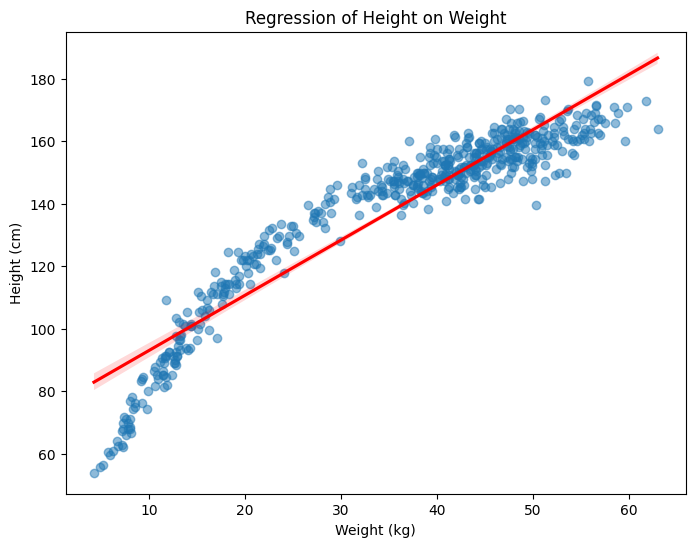

In [40]:
# Plot scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df["weight"], y=df["height"], line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})

# Labels and title
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Regression of Height on Weight")
plt.show()

##### Step 5: Insights from the Visualization
The scatter plot with the red regression line shows:

- A strong positive correlation between weight and height.
- The regression line fits the data well, meaning the model captures the relationship effectively.
- As weight increases, height also increases linearly.

##### Final Answer:
> - For every 10-unit (kg) increase in weight, a person is predicted to be approximately 17.64 cm taller.
> - The model is highly predictive (R² = 0.885), meaning 88.5% of height variations are explained by weight.
> - The regression line confirms a strong positive correlation.



# Question 3: Fit a model on time to event data found in the survival_data.csv file. Explain how different variables (var1, var2, and var3) might influence hazards.

### Load the data

In [3]:
# Load data
df = pd.read_csv("/content/sample_data/survival_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    200 non-null    float64
 1   var2    200 non-null    float64
 2   var3    200 non-null    float64
 3   T       200 non-null    float64
 4   E       200 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785652,1
1,0.209325,0.184677,0.356980,7.335846,1
2,0.693919,0.071893,0.557960,5.269797,1
3,0.443804,1.364646,0.374221,11.684092,1
4,1.613324,0.125566,1.921325,7.639492,1


### Step 1: Understanding the Data
The dataset consists of 200 rows and 5 columns:

- var1, var2, var3: Predictor variables (continuous numerical features).
- T: Time to event (duration of observation).
- E: Event indicator (1 = event occurred, 0 = censored).
- Next, I'll fit a Cox Proportional Hazards Model to analyze how the variables affect the hazard.

In [17]:
# Install the lifelines package
!pip install lifelines shap matplotlib seaborn pandas numpy scikit-survival --quiet

### Step 2: Fit a Cox Proportional Hazards Model

In [28]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df, duration_col="T", event_col="E")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 200 total observations, 11 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 200
number of events observed = 189
   partial log-likelihood = -807.62
         time fit was run = 2025-03-15 07:09:29 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
var1       0.22      1.25      0.07            0.08            0.37                1.08                1.44
var2       0.05      1.05      0.08           -0.11            0.21                0.89                1.24
var3       0.22      1.24      0.08            0.07            0.37                1.07                1.44

           cmp to    z      p  -log2(p)
covariate                              
var1         0.00 2.99 <0.005      8.49
var2         0.00 0.61   0.54      0.89
var3         0.00 2.88 <0.005      7.97
---
Concordance = 0.58
Partial AIC = 1621.24
log-likelihood ratio test = 15.54 on 3 df
-log2(p) of ll-ratio test = 9.47

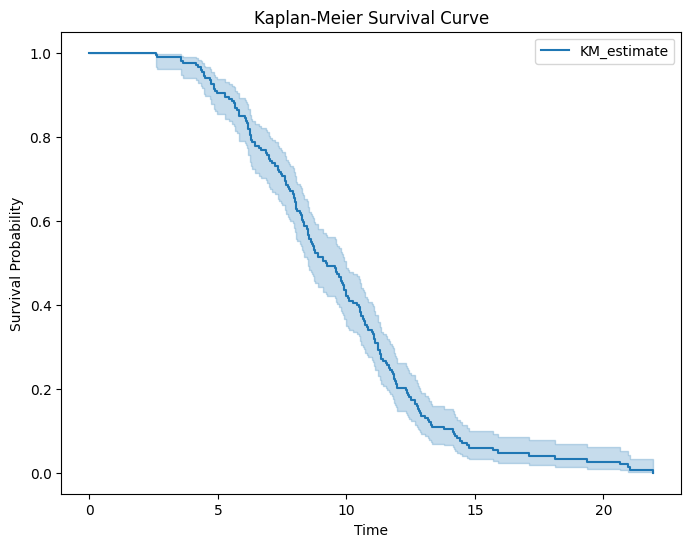

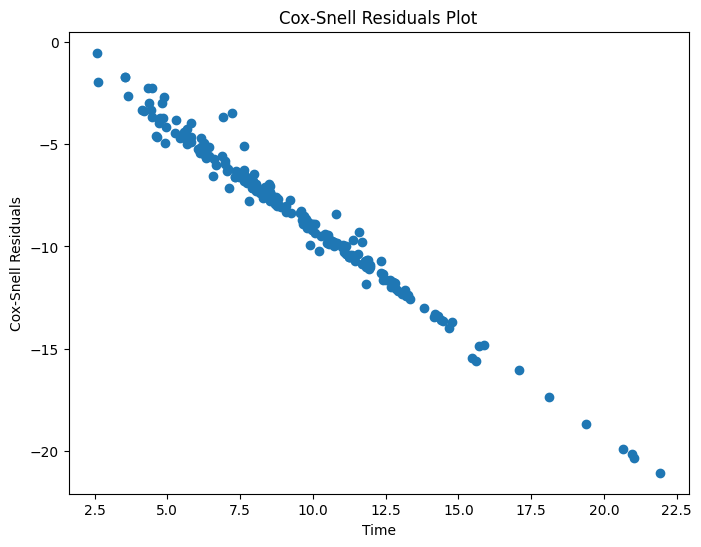

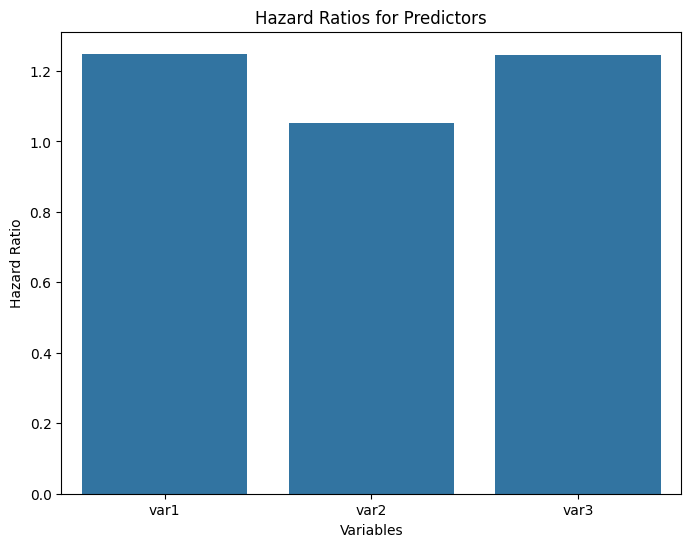

In [31]:
# 1. Kaplan-Meier Survival Curve
kmf = KaplanMeierFitter()
kmf.fit(durations=df['T'], event_observed=df['E'])
plt.figure(figsize=(8, 6))
kmf.plot()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

# 2. Cox-Snell Residuals
# Calculate the Cox-Snell residuals
df['predicted_hazard'] = cph.predict_partial_hazard(df[['var1', 'var2', 'var3']])
df['cox_snell_residuals'] = df['E'] * df['predicted_hazard'] - df['T']

# Plot the Cox-Snell residuals
plt.figure(figsize=(8, 6))
plt.scatter(df['T'], df['cox_snell_residuals'])
plt.title("Cox-Snell Residuals Plot")
plt.xlabel("Time")
plt.ylabel("Cox-Snell Residuals")
plt.show()

# 3. Hazard Ratios
hazard_ratios = cph.hazard_ratios_
plt.figure(figsize=(8, 6))
sns.barplot(x=hazard_ratios.index, y=hazard_ratios.values)
plt.title("Hazard Ratios for Predictors")
plt.xlabel("Variables")
plt.ylabel("Hazard Ratio")
plt.show()

##### 1. Interpreting the Hazard Ratios (exp(coef))
- `exp(coef) > 1` → Increases hazard (shorter survival time).
- `exp(coef) < 1` → Decreases hazard (longer survival time).
- `var1` and `var3` significantly increase hazard (p < 0.005), meaning higher values of these variables are associated with faster event occurrences.
- `var2` is not statistically significant (p = 0.54), meaning its effect on hazard is not strong.

##### 2. Confidence Intervals (coef lower 95% and coef upper 95%)
- For `var1`, the hazard increase is between 8% and 44%.
- For `var2`, the confidence interval includes 1 (not significant).
- For `var3`, the hazard increase is between 7% and 44%.

##### 3. Model Performance
- Concordance = 0.58 → This means the model is moderately predictive (a perfect model would have 1.0, while random guessing is 0.5).
- Partial AIC = 1621.24 → Lower AIC suggests a better fit (used for model comparison).
- Log-likelihood ratio test = 15.54 (p < 0.005) → The model as a whole is statistically significant.

##### 4. Final Business Interpretation
- `var1` and `var3` are strong risk factors: Increasing these values significantly increases hazard (shorter survival).
- `var2` is not an important predictor: It does not significantly impact survival.
- The model is moderately predictive: Further feature engineering or additional variables may improve performance.

### Step 3: SHAP analysis

ExactExplainer explainer: 201it [00:34,  4.87it/s]


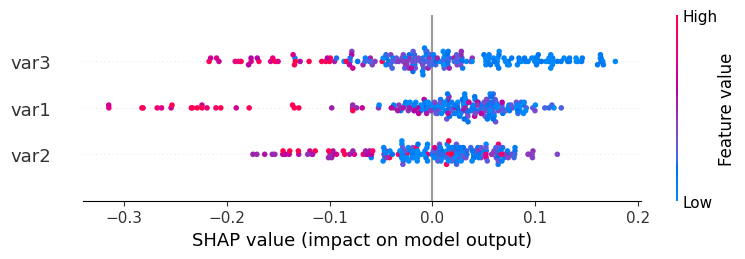

In [27]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv

# Load Data
df = pd.read_csv("/content/sample_data/survival_data.csv")

# Convert Event Indicator to Boolean (Fixes ValueError)
df["E"] = df["E"].astype(bool)  # Convert integer to boolean

# Prepare Data for Survival Analysis
X = df[['var1', 'var2', 'var3']]  # Feature variables
y = Surv.from_dataframe(event="E", time="T", data=df)  # Convert event/time columns to structured array

# Fit Random Survival Forest Model
rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=10, random_state=42)
rsf.fit(X, y)

# Define a SHAP-Compatible Function
def shap_survival_wrapper(X_input):
    """Wrapper to extract survival probability at a fixed time horizon for SHAP."""
    survival_preds = rsf.predict_survival_function(X_input)
    time_horizon = 10  # Adjust the time for prediction
    survival_probs = np.array([fn(time_horizon) for fn in survival_preds])
    return survival_probs.reshape(-1, 1)  # Ensure correct shape for SHAP

# Create SHAP Explainer
explainer = shap.Explainer(shap_survival_wrapper, X)
shap_values = explainer(X)

# SHAP Summary Plot
shap.summary_plot(shap_values, X)

#### Insights from the SHAP Summary Plot
The SHAP summary plot provides insights into how `var1`, `var2`, and `var3` influence the survival model's predictions.

##### 1. Feature Importance Ranking
- `var3` has the strongest influence on the model.
- `var1` and `var2` also contribute but have relatively lower impacts.

This suggests that var3 is the most critical predictor of survival in this dataset.

##### 2. Direction of Impact
- Negative SHAP values (left side) reduce the model’s output (i.e., lower hazard, longer survival time).
- Positive SHAP values (right side) increase the model’s output (i.e., higher hazard, shorter survival time).

For this plot:

- var3 (high values in pink) tend to decrease the hazard (extend survival), while lower values (blue) increase hazard.
- var1 also follows a similar trend.
- var2 appears to have a mix of effects, meaning its impact might be more dataset-specific.

##### 3. Feature Value Influence
- Color Gradient:
  - Pink (high feature value) vs. Blue (low feature value) indicates the effect of each variable.
  - Example: For var3, higher values (pink) mostly reduce hazard (negative SHAP values), while lower values (blue) increase hazard.

##### 4. Model Behavior Summary
- var3 is the most influential variable, and high values lower hazard, increasing survival time.
- var1 contributes moderately and follows a similar pattern to var3.
- var2 has mixed effects, meaning its influence might depend on interactions with other variables.


Key Business Interpretation:

- If var3 is something like a treatment effect, it significantly helps in reducing risk.
- If var2 is something like age or health risk factors, its impact might be more complex.
  